In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
OUTPUT_PATH = './Data/output/'

In [3]:
data_merged = pd.read_csv(OUTPUT_PATH + 'CleanData_clustering.csv')
data_merged = data_merged.dropna()

In [4]:
training_data, testing_data = train_test_split(data_merged, test_size=0.2, random_state=42)

In [5]:
X_train = training_data.drop(['NUM_SCHOOLS'], axis=1)
y_train = training_data['NUM_SCHOOLS']

X_test = testing_data.drop(['NUM_SCHOOLS'], axis=1)
y_test = testing_data['NUM_SCHOOLS']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [6]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_scaled, y_train)

RandomForestRegressor()

<BarContainer object of 19 artists>

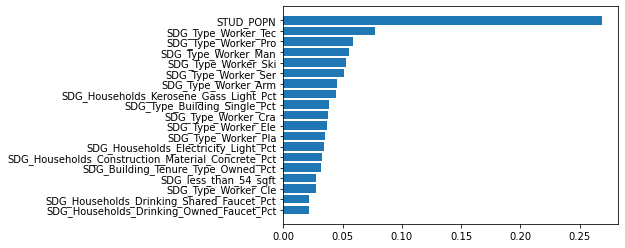

In [8]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])

In [18]:
df = pd.DataFrame(list(zip(list(X_train.columns[sorted_idx]), list(rf.feature_importances_[sorted_idx]))), 
                 columns = ['Feature name', 'Weight'])
df = df.sort_values(by=['Weight'], ascending=Fals)

In [14]:
df.to_csv(OUTPUT_PATH + 'Model_Top_features.csv', index=False)

In [19]:
df

,Feature name,Weight
0,SDG_Households_Drinking_Owned_Faucet_Pct,0.021776
1,SDG_Households_Drinking_Shared_Faucet_Pct,0.021818
2,SDG_Type_Worker_Cle,0.027599
3,SDG_less_than_54_sqft,0.027748
4,SDG_Building_Tenure_Type_Owned_Pct,0.031752
5,SDG_Households_Construction_Material_Concrete_Pct,0.032558
6,SDG_Households_Electricity_Light_Pct,0.034429
7,SDG_Type_Worker_Pla,0.034688
8,SDG_Type_Worker_Ele,0.036700
9,SDG_Type_Worker_Cra,0.037446
